In [26]:
import sys
import os

from os import listdir
from os.path import isfile, join
from pathlib import Path

root = Path(os.getcwd()).parent.parent
sys.path.append(str(root))

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

### 방문지 유형 상관 관계

In [40]:
type_path = join(root, 'data', 'checklist', 'type_corr.csv')
type_df = pd.read_csv(type_path)
type_df = type_df.set_index(['Unnamed: 0'])
type_df.index.name = None
type_df.head()

,new_patients,medical_institution,other,store,fnb,public_transportation,religious_facility,entertainment_facility,service_facility,sports_facility,...,club,public_institution,finantial_institution,gethering,outdoor,sauna,work,door_sales,exhibition,hall
new_patients,1.000000,0.250715,-0.145466,0.398482,0.325912,0.034169,0.109536,-0.064555,0.317406,0.347747,...,-0.052270,0.036585,0.379207,-0.010854,0.041045,0.052375,0.129594,-0.029201,0.109516,0.404484
medical_institution,0.250715,1.000000,0.476572,0.379891,0.200454,0.301724,0.143266,0.075029,0.260077,0.074955,...,-0.075861,0.016640,0.151241,-0.022533,-0.026846,-0.039873,0.166411,0.042394,0.008824,0.177308
other,-0.145466,0.476572,1.000000,0.213139,0.205182,0.319413,0.300489,0.244656,0.117413,0.033827,...,-0.030645,0.080370,-0.046058,-0.030355,0.043309,0.082029,0.051413,0.216484,-0.045460,-0.067895
store,0.398482,0.379891,0.213139,1.000000,0.594370,0.334859,0.228120,0.246400,0.273961,0.179856,...,-0.046553,0.120163,0.286853,0.314482,0.057712,0.139400,0.481274,-0.015424,0.103841,0.249844
fnb,0.325912,0.200454,0.205182,0.594370,1.000000,0.377020,0.222978,0.482926,0.342457,0.303337,...,0.333193,0.189205,0.244943,0.216588,0.194646,0.074456,0.198393,0.063382,0.154772,0.240051


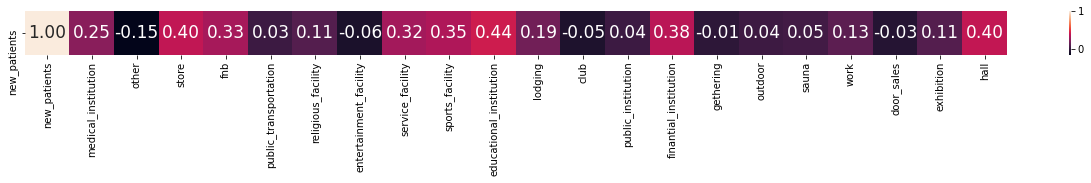

In [53]:
plt.figure(figsize=(22, 0.8))
sns.heatmap(type_df.iloc[:,:1].T, annot=True, fmt=".2f", annot_kws={"size": 17})
plt.show()

In [43]:
sorted_types = type_df.iloc[:,:1].T.iloc[0].sort_values(ascending=False).to_dict()
sorted_types

{'new_patients': 1.0,
 'educational_institution': 0.4356384532850077,
 'hall': 0.4044841922115479,
 'store': 0.39848194670060144,
 'finantial_institution': 0.3792066718607289,
 'sports_facility': 0.3477472588067361,
 'fnb': 0.3259119397639445,
 'service_facility': 0.3174060819879284,
 'medical_institution': 0.25071470229817283,
 'lodging': 0.1888900917969468,
 'work': 0.1295938296452827,
 'religious_facility': 0.1095363821482606,
 'exhibition': 0.10951577136716713,
 'sauna': 0.05237502726696573,
 'outdoor': 0.04104499666297782,
 'public_institution': 0.03658502326468187,
 'public_transportation': 0.034168525328516504,
 'gethering': -0.010853827098112829,
 'door_sales': -0.029201382813574112,
 'club': -0.05227021428533847,
 'entertainment_facility': -0.06455514679005027,
 'other': -0.14546562704781546}

### 감염 원인 상관 관계

In [54]:
reason_path = join(root, 'data', 'checklist', 'reason_corr.csv')
reason_df = pd.read_csv(reason_path)
reason_df = reason_df.set_index(['Unnamed: 0'])
reason_df.index.name = None
reason_df.head()

,new_patients,overseas,other,contact,hospital,building,church,call_center,health_facility,educational_facility,...,network_marketing,nursing_facility,company,gethering,public_transportation,office,bank,protest,theater,cafe
new_patients,1.000000,0.138834,0.588314,0.233087,-0.109059,-0.082045,0.530759,-0.056435,-0.024863,0.097242,...,-0.010677,0.039720,-0.008347,0.279860,-0.002073,0.107594,-0.025148,0.261907,0.059263,0.224172
overseas,0.138834,1.000000,0.351121,0.338501,-0.047415,-0.047755,-0.068819,0.056465,-0.088648,-0.080021,...,-0.101864,-0.070123,-0.047547,-0.096060,-0.067627,-0.076998,-0.039243,-0.035007,-0.051439,-0.031994
other,0.588314,0.351121,1.000000,0.478608,0.211011,0.197594,0.547081,0.061795,-0.071024,0.232697,...,-0.124979,-0.046658,-0.065895,0.175916,-0.076788,-0.015206,-0.059546,0.368017,0.314198,0.147354
contact,0.233087,0.338501,0.478608,1.000000,-0.024476,0.144800,0.389558,0.404458,-0.075904,0.044527,...,-0.107192,0.048988,-0.016172,0.144388,0.011783,0.040273,0.076549,0.161684,0.275037,0.054038
hospital,-0.109059,-0.047415,0.211011,-0.024476,1.000000,0.210832,-0.003114,-0.044401,-0.039473,-0.044522,...,-0.060617,-0.041878,-0.031903,-0.069137,-0.037177,-0.058609,-0.028829,-0.044370,-0.031127,-0.017588


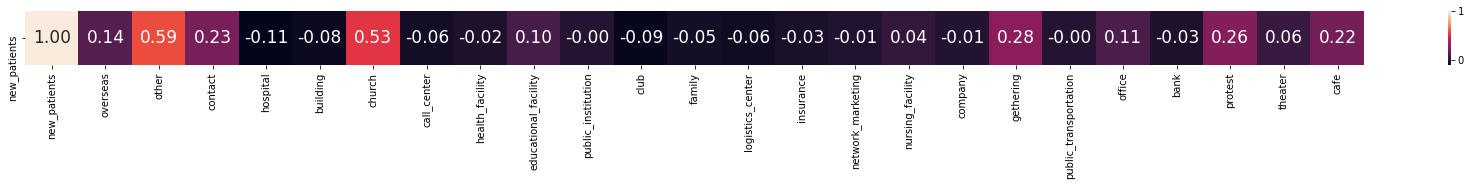

In [55]:
plt.figure(figsize=(30, 1))
sns.heatmap(reason_df.iloc[:,:1].T, annot=True, fmt=".2f", annot_kws={"size": 17})
plt.show()

In [56]:
sorted_types = reason_df.iloc[:,:1].T.iloc[0].sort_values(ascending=False).to_dict()
sorted_types

{'new_patients': 1.0,
 'other': 0.5883138693614303,
 'church': 0.5307593804920245,
 'gethering': 0.2798600903553677,
 'protest': 0.26190666627549064,
 'contact': 0.2330868169170341,
 'cafe': 0.22417156492703127,
 'overseas': 0.13883439300109698,
 'office': 0.10759418605527607,
 'educational_facility': 0.09724217996271332,
 'theater': 0.05926289641831318,
 'nursing_facility': 0.0397199097010172,
 'public_transportation': -0.002073372272212923,
 'public_institution': -0.0034106841033013807,
 'company': -0.008346679512418041,
 'network_marketing': -0.010676877496253479,
 'health_facility': -0.02486265231057,
 'bank': -0.025147910340661595,
 'insurance': -0.033692603317225414,
 'family': -0.05179314764116592,
 'call_center': -0.0564346642820208,
 'logistics_center': -0.057368353165966474,
 'building': -0.08204518766299529,
 'club': -0.09368236876137616,
 'hospital': -0.1090589460883626}